In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


Matplotlib is building the font cache; this may take a moment.
2024-03-16 01:59:00.620804: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-16 01:59:00.622686: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 01:59:00.630198: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 01:59:00.742939: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 01:59:03.087

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


2024-03-16 01:59:05.850516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:06.545839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:07.670203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:08.329278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:09.450965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:11.264525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


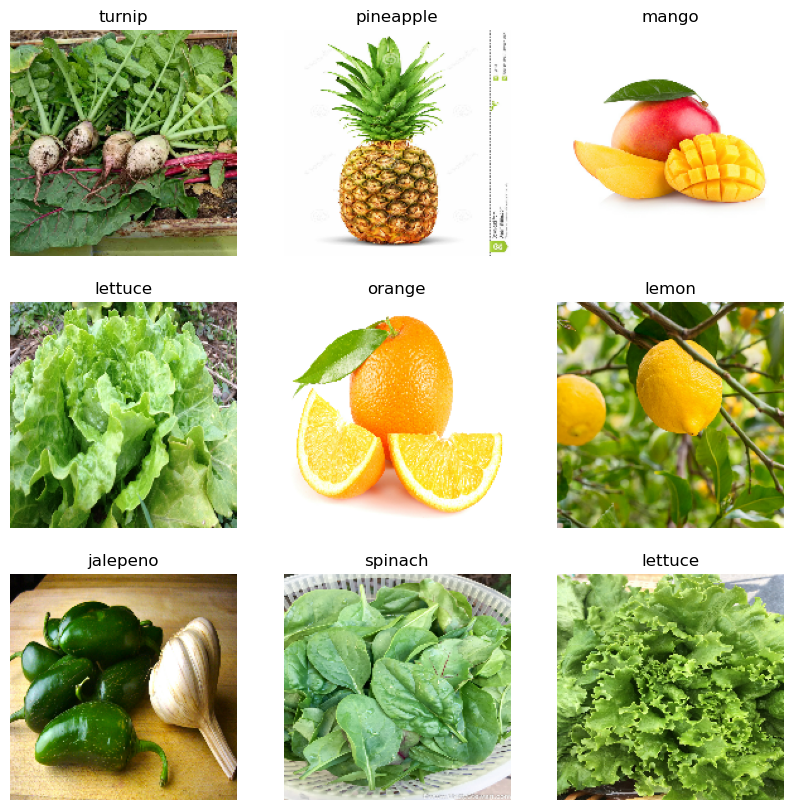

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-03-16 01:59:15.765433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:16.325692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:17.310870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:18.064829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:19.115721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 52s 557ms/step - accuracy: 0.0215 - loss: 4.4702

2024-03-16 01:59:21.887955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 757ms/step - accuracy: 0.0294 - loss: 4.4493

2024-03-16 01:59:26.189627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 01:59:26.432592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 52s 655ms/step - accuracy: 0.0349 - loss: 4.2239

2024-03-16 01:59:31.679817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 52s 666ms/step - accuracy: 0.0351 - loss: 4.2049

2024-03-16 01:59:32.778139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 52s 687ms/step - accuracy: 0.0357 - loss: 4.1696

2024-03-16 01:59:34.562079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 48s 666ms/step - accuracy: 0.0374 - loss: 4.1084

2024-03-16 01:59:36.519705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 42s 648ms/step - accuracy: 0.0406 - loss: 4.0225

2024-03-16 01:59:40.850728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 37s 678ms/step - accuracy: 0.0451 - loss: 3.9203

2024-03-16 01:59:48.895181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 36s 672ms/step - accuracy: 0.0455 - loss: 3.9123

2024-03-16 01:59:49.264525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 33s 678ms/step - accuracy: 0.0469 - loss: 3.8825

2024-03-16 01:59:52.091256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 31s 669ms/step - accuracy: 0.0478 - loss: 3.8617

2024-03-16 01:59:54.458830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 21s 662ms/step - accuracy: 0.0524 - loss: 3.7782

2024-03-16 02:00:03.138812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 21s 663ms/step - accuracy: 0.0527 - loss: 3.7728

2024-03-16 02:00:03.482865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 661ms/step - accuracy: 0.0556 - loss: 3.7329

2024-03-16 02:00:08.853592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 15s 660ms/step - accuracy: 0.0560 - loss: 3.7282

2024-03-16 02:00:09.823598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 664ms/step - accuracy: 0.0595 - loss: 3.6876

2024-03-16 02:00:15.424592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 661ms/step - accuracy: 0.0599 - loss: 3.6834

2024-03-16 02:00:16.340295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.0652 - loss: 3.6314

2024-03-16 02:00:24.521663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:00:25.859021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 704ms/step - accuracy: 0.0657 - loss: 3.6277 - val_accuracy: 0.2991 - val_loss: 2.5010
Epoch 2/25


2024-03-16 02:00:37.666258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:00:38.156200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:00:39.073846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:00:39.670671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:00:40.608624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 55s 586ms/step - accuracy: 0.1979 - loss: 2.8109 

2024-03-16 02:00:43.235265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 694ms/step - accuracy: 0.2214 - loss: 2.7280

2024-03-16 02:00:46.967664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:00:47.225803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 50s 630ms/step - accuracy: 0.2397 - loss: 2.7007

2024-03-16 02:00:52.541068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 50s 643ms/step - accuracy: 0.2403 - loss: 2.6996

2024-03-16 02:00:53.545210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 50s 662ms/step - accuracy: 0.2417 - loss: 2.6956

2024-03-16 02:00:55.273351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 46s 638ms/step - accuracy: 0.2441 - loss: 2.6868

2024-03-16 02:00:57.095530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 617ms/step - accuracy: 0.2454 - loss: 2.6805

2024-03-16 02:01:00.993515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 35s 648ms/step - accuracy: 0.2453 - loss: 2.6781

2024-03-16 02:01:08.849409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 34s 643ms/step - accuracy: 0.2453 - loss: 2.6778

2024-03-16 02:01:09.093266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 649ms/step - accuracy: 0.2456 - loss: 2.6754

2024-03-16 02:01:12.001362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 29s 643ms/step - accuracy: 0.2457 - loss: 2.6725

2024-03-16 02:01:14.227367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 629ms/step - accuracy: 0.2478 - loss: 2.6591

2024-03-16 02:01:22.264825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 630ms/step - accuracy: 0.2481 - loss: 2.6580

2024-03-16 02:01:22.658014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 631ms/step - accuracy: 0.2501 - loss: 2.6494

2024-03-16 02:01:28.058824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 632ms/step - accuracy: 0.2503 - loss: 2.6483

2024-03-16 02:01:29.052277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 639ms/step - accuracy: 0.2527 - loss: 2.6378

2024-03-16 02:01:34.564515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 634ms/step - accuracy: 0.2530 - loss: 2.6365

2024-03-16 02:01:35.402743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.2568 - loss: 2.6199

2024-03-16 02:01:43.304002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:01:44.471041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 675ms/step - accuracy: 0.2571 - loss: 2.6187 - val_accuracy: 0.5470 - val_loss: 1.7826
Epoch 3/25


2024-03-16 02:01:47.121354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:01:47.661784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:01:48.569384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:01:49.121170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:01:50.096653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 54s 576ms/step - accuracy: 0.3379 - loss: 2.2445

2024-03-16 02:01:52.663859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 679ms/step - accuracy: 0.3563 - loss: 2.2072

2024-03-16 02:01:56.343877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:01:56.607640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 603ms/step - accuracy: 0.3646 - loss: 2.1989

2024-03-16 02:02:01.553886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 48s 615ms/step - accuracy: 0.3650 - loss: 2.1993

2024-03-16 02:02:02.537075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 49s 645ms/step - accuracy: 0.3652 - loss: 2.2022

2024-03-16 02:02:04.484983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 46s 633ms/step - accuracy: 0.3669 - loss: 2.2035

2024-03-16 02:02:06.474641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 611ms/step - accuracy: 0.3714 - loss: 2.2000

2024-03-16 02:02:10.300495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 35s 641ms/step - accuracy: 0.3770 - loss: 2.1893

2024-03-16 02:02:18.094996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.3774 - loss: 2.1884

2024-03-16 02:02:18.327518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 641ms/step - accuracy: 0.3788 - loss: 2.1843

2024-03-16 02:02:21.117126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 29s 633ms/step - accuracy: 0.3798 - loss: 2.1806

2024-03-16 02:02:23.237471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 618ms/step - accuracy: 0.3845 - loss: 2.1630

2024-03-16 02:02:31.129445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 621ms/step - accuracy: 0.3849 - loss: 2.1617

2024-03-16 02:02:31.534534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 637ms/step - accuracy: 0.3875 - loss: 2.1514

2024-03-16 02:02:37.998915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 638ms/step - accuracy: 0.3878 - loss: 2.1501

2024-03-16 02:02:39.089585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - accuracy: 0.3908 - loss: 2.1393

2024-03-16 02:02:45.457064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 651ms/step - accuracy: 0.3911 - loss: 2.1381

2024-03-16 02:02:46.268741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.3945 - loss: 2.1235

2024-03-16 02:02:54.113460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:02:55.273819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 689ms/step - accuracy: 0.3947 - loss: 2.1224 - val_accuracy: 0.6553 - val_loss: 1.2860
Epoch 4/25


2024-03-16 02:02:57.962206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:02:58.507357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:02:59.428917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:02:59.981631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:03:00.895515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 53s 566ms/step - accuracy: 0.4297 - loss: 2.0154

2024-03-16 02:03:03.470891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 727ms/step - accuracy: 0.4366 - loss: 1.9135

2024-03-16 02:03:07.571655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:03:07.853138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 51s 639ms/step - accuracy: 0.4611 - loss: 1.8323

2024-03-16 02:03:12.934239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 51s 647ms/step - accuracy: 0.4628 - loss: 1.8284

2024-03-16 02:03:13.939936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 51s 664ms/step - accuracy: 0.4655 - loss: 1.8217

2024-03-16 02:03:15.627488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 47s 654ms/step - accuracy: 0.4703 - loss: 1.8084

2024-03-16 02:03:17.787363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.4788 - loss: 1.7854

2024-03-16 02:03:21.983904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 36s 664ms/step - accuracy: 0.4909 - loss: 1.7536

2024-03-16 02:03:29.858622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 35s 656ms/step - accuracy: 0.4919 - loss: 1.7507

2024-03-16 02:03:30.073528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 33s 661ms/step - accuracy: 0.4955 - loss: 1.7397

2024-03-16 02:03:32.901211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 653ms/step - accuracy: 0.4981 - loss: 1.7319

2024-03-16 02:03:35.135155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 21s 645ms/step - accuracy: 0.5094 - loss: 1.6963

2024-03-16 02:03:43.679514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 648ms/step - accuracy: 0.5101 - loss: 1.6940

2024-03-16 02:03:44.060154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 649ms/step - accuracy: 0.5152 - loss: 1.6763

2024-03-16 02:03:49.610634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 648ms/step - accuracy: 0.5158 - loss: 1.6743

2024-03-16 02:03:50.559942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 653ms/step - accuracy: 0.5204 - loss: 1.6582

2024-03-16 02:03:56.095979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 649ms/step - accuracy: 0.5209 - loss: 1.6565

2024-03-16 02:03:57.073933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.5265 - loss: 1.6363

2024-03-16 02:04:05.074009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:04:06.254657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 691ms/step - accuracy: 0.5269 - loss: 1.6348 - val_accuracy: 0.8348 - val_loss: 0.7492
Epoch 5/25


2024-03-16 02:04:08.967652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:04:09.529640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:04:10.547974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:04:11.298677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:04:12.286442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 52s 562ms/step - accuracy: 0.6549 - loss: 1.2118

2024-03-16 02:04:14.849138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 684ms/step - accuracy: 0.6656 - loss: 1.1881

2024-03-16 02:04:18.577620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:04:18.876433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 608ms/step - accuracy: 0.6698 - loss: 1.1848

2024-03-16 02:04:23.823198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 48s 619ms/step - accuracy: 0.6703 - loss: 1.1831

2024-03-16 02:04:24.838264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 48s 635ms/step - accuracy: 0.6716 - loss: 1.1787

2024-03-16 02:04:26.405159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 45s 617ms/step - accuracy: 0.6745 - loss: 1.1675

2024-03-16 02:04:28.301604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 614ms/step - accuracy: 0.6788 - loss: 1.1513

2024-03-16 02:04:32.674982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 36s 657ms/step - accuracy: 0.6849 - loss: 1.1314

2024-03-16 02:04:40.983460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 35s 650ms/step - accuracy: 0.6855 - loss: 1.1295

2024-03-16 02:04:41.261113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 658ms/step - accuracy: 0.6876 - loss: 1.1225

2024-03-16 02:04:44.159193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 650ms/step - accuracy: 0.6891 - loss: 1.1170

2024-03-16 02:04:46.398603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 21s 639ms/step - accuracy: 0.6973 - loss: 1.0883

2024-03-16 02:04:54.731004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 642ms/step - accuracy: 0.6979 - loss: 1.0863

2024-03-16 02:04:55.099496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 640ms/step - accuracy: 0.7018 - loss: 1.0722

2024-03-16 02:05:00.364491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 639ms/step - accuracy: 0.7023 - loss: 1.0705

2024-03-16 02:05:01.285669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 643ms/step - accuracy: 0.7058 - loss: 1.0579

2024-03-16 02:05:06.602429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 640ms/step - accuracy: 0.7061 - loss: 1.0566

2024-03-16 02:05:07.537057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.7105 - loss: 1.0416

2024-03-16 02:05:16.138588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:05:17.333626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 688ms/step - accuracy: 0.7108 - loss: 1.0405 - val_accuracy: 0.8803 - val_loss: 0.5389
Epoch 6/25


2024-03-16 02:05:20.113582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:05:20.657177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:05:21.613796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:05:22.161820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:05:23.201515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 54s 577ms/step - accuracy: 0.8438 - loss: 0.7025

2024-03-16 02:05:25.945888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 697ms/step - accuracy: 0.8246 - loss: 0.7110

2024-03-16 02:05:29.735429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:05:29.972521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 612ms/step - accuracy: 0.8134 - loss: 0.6999

2024-03-16 02:05:34.957946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 49s 624ms/step - accuracy: 0.8133 - loss: 0.6993

2024-03-16 02:05:35.982997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 49s 642ms/step - accuracy: 0.8128 - loss: 0.6992

2024-03-16 02:05:37.575973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 45s 619ms/step - accuracy: 0.8134 - loss: 0.6940

2024-03-16 02:05:39.337980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 602ms/step - accuracy: 0.8146 - loss: 0.6860

2024-03-16 02:05:43.328533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy: 0.8164 - loss: 0.6770

2024-03-16 02:05:51.830736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 34s 646ms/step - accuracy: 0.8166 - loss: 0.6760

2024-03-16 02:05:52.090070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 657ms/step - accuracy: 0.8178 - loss: 0.6717

2024-03-16 02:05:55.098746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 648ms/step - accuracy: 0.8187 - loss: 0.6682

2024-03-16 02:05:57.254539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 636ms/step - accuracy: 0.8242 - loss: 0.6485

2024-03-16 02:06:05.477456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 638ms/step - accuracy: 0.8246 - loss: 0.6471

2024-03-16 02:06:05.912139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 644ms/step - accuracy: 0.8275 - loss: 0.6365

2024-03-16 02:06:11.625185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 643ms/step - accuracy: 0.8279 - loss: 0.6353

2024-03-16 02:06:12.656583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - accuracy: 0.8305 - loss: 0.6251

2024-03-16 02:06:18.785169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 653ms/step - accuracy: 0.8308 - loss: 0.6240

2024-03-16 02:06:19.776156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8338 - loss: 0.6126

2024-03-16 02:06:28.762683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:06:30.044740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 706ms/step - accuracy: 0.8339 - loss: 0.6119 - val_accuracy: 0.9031 - val_loss: 0.5019
Epoch 7/25


2024-03-16 02:06:32.878609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:06:33.491357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:06:34.663809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:06:35.517938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:06:36.591227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 56s 598ms/step - accuracy: 0.8242 - loss: 0.5629 

2024-03-16 02:06:39.608676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 723ms/step - accuracy: 0.8375 - loss: 0.5444

2024-03-16 02:06:43.532077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:06:43.815882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 50s 631ms/step - accuracy: 0.8489 - loss: 0.5199

2024-03-16 02:06:48.815325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 50s 645ms/step - accuracy: 0.8501 - loss: 0.5165

2024-03-16 02:06:49.878137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 50s 659ms/step - accuracy: 0.8527 - loss: 0.5096

2024-03-16 02:06:51.564521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 46s 640ms/step - accuracy: 0.8576 - loss: 0.4974

2024-03-16 02:06:53.419413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 610ms/step - accuracy: 0.8651 - loss: 0.4822

2024-03-16 02:06:57.125571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 34s 637ms/step - accuracy: 0.8733 - loss: 0.4635

2024-03-16 02:07:05.083177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:05.295988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 642ms/step - accuracy: 0.8752 - loss: 0.4577

2024-03-16 02:07:07.984822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 29s 634ms/step - accuracy: 0.8769 - loss: 0.4527

2024-03-16 02:07:10.093189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 620ms/step - accuracy: 0.8811 - loss: 0.4386

2024-03-16 02:07:18.048224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 622ms/step - accuracy: 0.8813 - loss: 0.4376

2024-03-16 02:07:18.401542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 621ms/step - accuracy: 0.8834 - loss: 0.4300

2024-03-16 02:07:23.524528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 619ms/step - accuracy: 0.8836 - loss: 0.4292

2024-03-16 02:07:24.433088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 622ms/step - accuracy: 0.8856 - loss: 0.4220

2024-03-16 02:07:29.483459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 617ms/step - accuracy: 0.8858 - loss: 0.4212

2024-03-16 02:07:30.347436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.8885 - loss: 0.4118

2024-03-16 02:07:38.251409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:39.425286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 660ms/step - accuracy: 0.8886 - loss: 0.4112 - val_accuracy: 0.9316 - val_loss: 0.4299
Epoch 8/25


2024-03-16 02:07:41.961606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:42.469543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:43.338166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:43.917001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:44.795598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 743ms/step - accuracy: 0.8809 - loss: 0.4150

2024-03-16 02:07:47.973208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 782ms/step - accuracy: 0.8822 - loss: 0.4251

2024-03-16 02:07:51.983502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:07:52.220052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 53s 675ms/step - accuracy: 0.8925 - loss: 0.3959

2024-03-16 02:07:57.540733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 53s 683ms/step - accuracy: 0.8932 - loss: 0.3938

2024-03-16 02:07:58.553869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 53s 691ms/step - accuracy: 0.8949 - loss: 0.3904

2024-03-16 02:08:00.207162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 49s 673ms/step - accuracy: 0.8979 - loss: 0.3848

2024-03-16 02:08:02.271494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 43s 655ms/step - accuracy: 0.9014 - loss: 0.3773

2024-03-16 02:08:06.510698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 37s 685ms/step - accuracy: 0.9065 - loss: 0.3618

2024-03-16 02:08:14.749046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 36s 678ms/step - accuracy: 0.9070 - loss: 0.3602

2024-03-16 02:08:15.034204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 34s 681ms/step - accuracy: 0.9086 - loss: 0.3541

2024-03-16 02:08:17.792993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 31s 673ms/step - accuracy: 0.9097 - loss: 0.3499

2024-03-16 02:08:20.303467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 22s 671ms/step - accuracy: 0.9144 - loss: 0.3329

2024-03-16 02:08:29.347152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 21s 674ms/step - accuracy: 0.9146 - loss: 0.3321

2024-03-16 02:08:29.764883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 677ms/step - accuracy: 0.9167 - loss: 0.3254

2024-03-16 02:08:35.656019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 15s 677ms/step - accuracy: 0.9170 - loss: 0.3246

2024-03-16 02:08:36.722626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 680ms/step - accuracy: 0.9190 - loss: 0.3179 

2024-03-16 02:08:42.297243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 676ms/step - accuracy: 0.9192 - loss: 0.3173

2024-03-16 02:08:43.137137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.9211 - loss: 0.3102

2024-03-16 02:08:51.695210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:08:52.947153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 720ms/step - accuracy: 0.9212 - loss: 0.3098 - val_accuracy: 0.9345 - val_loss: 0.5448
Epoch 9/25


2024-03-16 02:08:55.796504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:08:56.334810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:08:57.338422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:08:57.930396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:08:58.916518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 54s 584ms/step - accuracy: 0.9388 - loss: 0.2208 

2024-03-16 02:09:01.556638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 674ms/step - accuracy: 0.9321 - loss: 0.2321

2024-03-16 02:09:05.189405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 679ms/step - accuracy: 0.9324 - loss: 0.2315

2024-03-16 02:09:05.495512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 49s 622ms/step - accuracy: 0.9298 - loss: 0.2371

2024-03-16 02:09:10.727936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 50s 636ms/step - accuracy: 0.9298 - loss: 0.2374

2024-03-16 02:09:11.800519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 50s 659ms/step - accuracy: 0.9301 - loss: 0.2375

2024-03-16 02:09:13.586398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 46s 640ms/step - accuracy: 0.9307 - loss: 0.2368

2024-03-16 02:09:15.502412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 618ms/step - accuracy: 0.9321 - loss: 0.2363

2024-03-16 02:09:19.407885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.9332 - loss: 0.2355

2024-03-16 02:09:28.224551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:09:28.409153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - accuracy: 0.9337 - loss: 0.2344

2024-03-16 02:09:31.111922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 30s 655ms/step - accuracy: 0.9342 - loss: 0.2337

2024-03-16 02:09:33.237271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 633ms/step - accuracy: 0.9356 - loss: 0.2314

2024-03-16 02:09:40.887418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 635ms/step - accuracy: 0.9356 - loss: 0.2312

2024-03-16 02:09:41.302954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 629ms/step - accuracy: 0.9362 - loss: 0.2303

2024-03-16 02:09:46.203432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 628ms/step - accuracy: 0.9363 - loss: 0.2302

2024-03-16 02:09:47.147030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 630ms/step - accuracy: 0.9370 - loss: 0.2293

2024-03-16 02:09:52.209470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 626ms/step - accuracy: 0.9370 - loss: 0.2292

2024-03-16 02:09:52.966817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.9378 - loss: 0.2281

2024-03-16 02:10:01.191381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:02.566988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 676ms/step - accuracy: 0.9379 - loss: 0.2280 - val_accuracy: 0.9373 - val_loss: 0.5322
Epoch 10/25


2024-03-16 02:10:05.601497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:06.161560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:07.173559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:07.853331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:08.902815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 58s 618ms/step - accuracy: 0.9642 - loss: 0.1259 

2024-03-16 02:10:11.953022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 723ms/step - accuracy: 0.9595 - loss: 0.1464

2024-03-16 02:10:15.799661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:16.078509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 50s 630ms/step - accuracy: 0.9573 - loss: 0.1641

2024-03-16 02:10:21.129020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 50s 641ms/step - accuracy: 0.9573 - loss: 0.1649

2024-03-16 02:10:22.194391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 50s 658ms/step - accuracy: 0.9574 - loss: 0.1660

2024-03-16 02:10:23.769433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 46s 631ms/step - accuracy: 0.9577 - loss: 0.1692

2024-03-16 02:10:25.551545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 602ms/step - accuracy: 0.9585 - loss: 0.1697

2024-03-16 02:10:29.161376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 34s 628ms/step - accuracy: 0.9598 - loss: 0.1677

2024-03-16 02:10:36.678676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:10:36.872091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 31s 632ms/step - accuracy: 0.9602 - loss: 0.1677

2024-03-16 02:10:39.881624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 28s 627ms/step - accuracy: 0.9604 - loss: 0.1677

2024-03-16 02:10:42.006857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 610ms/step - accuracy: 0.9607 - loss: 0.1676

2024-03-16 02:10:49.735714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 612ms/step - accuracy: 0.9608 - loss: 0.1675

2024-03-16 02:10:50.069076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 611ms/step - accuracy: 0.9611 - loss: 0.1671

2024-03-16 02:10:55.131513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 611ms/step - accuracy: 0.9611 - loss: 0.1670

2024-03-16 02:10:56.086910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 616ms/step - accuracy: 0.9616 - loss: 0.1662

2024-03-16 02:11:01.289460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 612ms/step - accuracy: 0.9616 - loss: 0.1661

2024-03-16 02:11:02.077946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9621 - loss: 0.1654

2024-03-16 02:11:09.417090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:11:10.591621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 652ms/step - accuracy: 0.9621 - loss: 0.1653 - val_accuracy: 0.9601 - val_loss: 0.3029
Epoch 11/25


2024-03-16 02:11:13.478236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:11:13.966645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:11:14.921614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:11:15.474671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:11:16.371324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 52s 557ms/step - accuracy: 0.9766 - loss: 0.1189

2024-03-16 02:11:18.846582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 59s 658ms/step - accuracy: 0.9702 - loss: 0.1312

2024-03-16 02:11:22.522093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 676ms/step - accuracy: 0.9692 - loss: 0.1363

2024-03-16 02:11:22.803661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 46s 587ms/step - accuracy: 0.9653 - loss: 0.1478

2024-03-16 02:11:27.499803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 47s 597ms/step - accuracy: 0.9653 - loss: 0.1476

2024-03-16 02:11:28.467953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 47s 615ms/step - accuracy: 0.9653 - loss: 0.1481

2024-03-16 02:11:30.084173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 43s 603ms/step - accuracy: 0.9658 - loss: 0.1475

2024-03-16 02:11:31.931097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 38s 577ms/step - accuracy: 0.9669 - loss: 0.1439

2024-03-16 02:11:35.495154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 33s 608ms/step - accuracy: 0.9686 - loss: 0.1376

2024-03-16 02:11:42.918148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:11:43.104422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.9693 - loss: 0.1352

2024-03-16 02:11:46.072006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 28s 614ms/step - accuracy: 0.9698 - loss: 0.1336

2024-03-16 02:11:48.465210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 603ms/step - accuracy: 0.9710 - loss: 0.1294

2024-03-16 02:11:56.415066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 606ms/step - accuracy: 0.9710 - loss: 0.1291

2024-03-16 02:11:56.791357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 606ms/step - accuracy: 0.9712 - loss: 0.1305

2024-03-16 02:12:01.876431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 606ms/step - accuracy: 0.9712 - loss: 0.1306

2024-03-16 02:12:02.799058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 608ms/step - accuracy: 0.9712 - loss: 0.1323

2024-03-16 02:12:07.790866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 605ms/step - accuracy: 0.9712 - loss: 0.1325

2024-03-16 02:12:08.604401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.9709 - loss: 0.1350

2024-03-16 02:12:16.053079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:17.167408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 643ms/step - accuracy: 0.9709 - loss: 0.1352 - val_accuracy: 0.9402 - val_loss: 0.4943
Epoch 12/25


2024-03-16 02:12:19.755326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:20.277993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:21.216984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:21.875496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:22.838870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 55s 588ms/step - accuracy: 0.9551 - loss: 0.1781

2024-03-16 02:12:25.462631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 59s 669ms/step - accuracy: 0.9533 - loss: 0.1753

2024-03-16 02:12:29.042017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:29.303487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 47s 599ms/step - accuracy: 0.9576 - loss: 0.1575

2024-03-16 02:12:34.252423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 48s 611ms/step - accuracy: 0.9577 - loss: 0.1570

2024-03-16 02:12:35.253219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 48s 627ms/step - accuracy: 0.9581 - loss: 0.1563

2024-03-16 02:12:36.829450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 607ms/step - accuracy: 0.9585 - loss: 0.1563

2024-03-16 02:12:38.585607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 38s 582ms/step - accuracy: 0.9588 - loss: 0.1575

2024-03-16 02:12:42.160793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 32s 601ms/step - accuracy: 0.9595 - loss: 0.1559

2024-03-16 02:12:49.512240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:12:49.659948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 608ms/step - accuracy: 0.9600 - loss: 0.1548

2024-03-16 02:12:52.341283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 27s 602ms/step - accuracy: 0.9604 - loss: 0.1539

2024-03-16 02:12:54.391685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - accuracy: 0.9615 - loss: 0.1508

2024-03-16 02:13:02.615485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 601ms/step - accuracy: 0.9615 - loss: 0.1506

2024-03-16 02:13:03.040834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 604ms/step - accuracy: 0.9619 - loss: 0.1498

2024-03-16 02:13:08.213430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 603ms/step - accuracy: 0.9619 - loss: 0.1498

2024-03-16 02:13:09.210777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 622ms/step - accuracy: 0.9625 - loss: 0.1489

2024-03-16 02:13:15.392665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 618ms/step - accuracy: 0.9625 - loss: 0.1489

2024-03-16 02:13:16.380017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.9631 - loss: 0.1476

2024-03-16 02:13:25.622934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:13:26.986525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 681ms/step - accuracy: 0.9631 - loss: 0.1474 - val_accuracy: 0.9544 - val_loss: 0.5042
Epoch 13/25


2024-03-16 02:13:30.012830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:13:30.505454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:13:31.581632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:13:32.390332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:13:33.650658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 59s 633ms/step - accuracy: 0.9544 - loss: 0.1212 

2024-03-16 02:13:36.731965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 709ms/step - accuracy: 0.9587 - loss: 0.1239

2024-03-16 02:13:40.465727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:13:40.679123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 47s 597ms/step - accuracy: 0.9648 - loss: 0.1151

2024-03-16 02:13:45.274948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 47s 606ms/step - accuracy: 0.9654 - loss: 0.1140

2024-03-16 02:13:46.183551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 47s 616ms/step - accuracy: 0.9665 - loss: 0.1119

2024-03-16 02:13:47.694708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 606ms/step - accuracy: 0.9681 - loss: 0.1108

2024-03-16 02:13:49.663462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 592ms/step - accuracy: 0.9704 - loss: 0.1092

2024-03-16 02:13:53.581263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 35s 651ms/step - accuracy: 0.9719 - loss: 0.1101

2024-03-16 02:14:02.213045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 34s 643ms/step - accuracy: 0.9720 - loss: 0.1102

2024-03-16 02:14:02.415850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 33s 660ms/step - accuracy: 0.9722 - loss: 0.1104

2024-03-16 02:14:05.611901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 654ms/step - accuracy: 0.9724 - loss: 0.1106

2024-03-16 02:14:08.413597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 22s 670ms/step - accuracy: 0.9729 - loss: 0.1109

2024-03-16 02:14:18.442484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 21s 676ms/step - accuracy: 0.9729 - loss: 0.1109

2024-03-16 02:14:19.020670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 682ms/step - accuracy: 0.9731 - loss: 0.1111

2024-03-16 02:14:25.037336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 15s 681ms/step - accuracy: 0.9731 - loss: 0.1111

2024-03-16 02:14:25.978441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 676ms/step - accuracy: 0.9731 - loss: 0.1128 

2024-03-16 02:14:30.991413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 671ms/step - accuracy: 0.9731 - loss: 0.1130

2024-03-16 02:14:31.791897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9732 - loss: 0.1145

2024-03-16 02:14:39.477504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:14:40.660982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 702ms/step - accuracy: 0.9732 - loss: 0.1146 - val_accuracy: 0.9487 - val_loss: 0.4763
Epoch 14/25


2024-03-16 02:14:43.098694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:14:43.606972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:14:44.538967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:14:45.129015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:14:46.056891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 59s 628ms/step - accuracy: 0.9980 - loss: 0.0787 

2024-03-16 02:14:48.894585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 741ms/step - accuracy: 0.9909 - loss: 0.0969

2024-03-16 02:14:52.908956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:14:53.105330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 49s 625ms/step - accuracy: 0.9858 - loss: 0.0962

2024-03-16 02:14:57.910469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 49s 633ms/step - accuracy: 0.9854 - loss: 0.0963

2024-03-16 02:14:58.860713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 49s 649ms/step - accuracy: 0.9848 - loss: 0.0959

2024-03-16 02:15:00.475262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 46s 632ms/step - accuracy: 0.9837 - loss: 0.0960

2024-03-16 02:15:02.421534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 608ms/step - accuracy: 0.9817 - loss: 0.1013

2024-03-16 02:15:06.154487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 34s 629ms/step - accuracy: 0.9801 - loss: 0.1058

2024-03-16 02:15:13.489980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:15:13.664377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 31s 632ms/step - accuracy: 0.9798 - loss: 0.1069

2024-03-16 02:15:16.653986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 28s 625ms/step - accuracy: 0.9795 - loss: 0.1085

2024-03-16 02:15:18.752516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 623ms/step - accuracy: 0.9790 - loss: 0.1114

2024-03-16 02:15:27.431147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 626ms/step - accuracy: 0.9790 - loss: 0.1116

2024-03-16 02:15:27.818450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 639ms/step - accuracy: 0.9789 - loss: 0.1126

2024-03-16 02:15:34.002617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 637ms/step - accuracy: 0.9789 - loss: 0.1127

2024-03-16 02:15:34.949642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.9788 - loss: 0.1129

2024-03-16 02:15:39.718765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 632ms/step - accuracy: 0.9788 - loss: 0.1130

2024-03-16 02:15:40.600846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.9785 - loss: 0.1136

2024-03-16 02:15:48.234973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:15:49.375818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 668ms/step - accuracy: 0.9785 - loss: 0.1137 - val_accuracy: 0.9516 - val_loss: 0.4537
Epoch 15/25


2024-03-16 02:15:51.927000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:15:52.425023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:15:53.366928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:15:54.082657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:15:54.968709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 50s 540ms/step - accuracy: 0.9935 - loss: 0.0423

2024-03-16 02:15:57.474824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 58s 660ms/step - accuracy: 0.9861 - loss: 0.0551

2024-03-16 02:16:01.142137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:16:01.403674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 46s 579ms/step - accuracy: 0.9844 - loss: 0.0570

2024-03-16 02:16:06.103382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 46s 589ms/step - accuracy: 0.9844 - loss: 0.0569

2024-03-16 02:16:06.990458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 46s 600ms/step - accuracy: 0.9846 - loss: 0.0564

2024-03-16 02:16:08.419998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 42s 579ms/step - accuracy: 0.9849 - loss: 0.0565

2024-03-16 02:16:10.058263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 36s 555ms/step - accuracy: 0.9849 - loss: 0.0625

2024-03-16 02:16:13.557309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 32s 599ms/step - accuracy: 0.9846 - loss: 0.0717

2024-03-16 02:16:21.247470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:16:21.451196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 31s 617ms/step - accuracy: 0.9844 - loss: 0.0740

2024-03-16 02:16:24.738233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 28s 616ms/step - accuracy: 0.9842 - loss: 0.0765

2024-03-16 02:16:27.414283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 625ms/step - accuracy: 0.9835 - loss: 0.0820

2024-03-16 02:16:36.477084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 629ms/step - accuracy: 0.9834 - loss: 0.0824

2024-03-16 02:16:36.931163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 643ms/step - accuracy: 0.9830 - loss: 0.0855

2024-03-16 02:16:43.254137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 642ms/step - accuracy: 0.9829 - loss: 0.0859

2024-03-16 02:16:44.322063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 652ms/step - accuracy: 0.9826 - loss: 0.0885

2024-03-16 02:16:50.061355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 647ms/step - accuracy: 0.9826 - loss: 0.0887

2024-03-16 02:16:50.840411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.9824 - loss: 0.0906

2024-03-16 02:16:58.757942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:16:59.903294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 685ms/step - accuracy: 0.9823 - loss: 0.0907 - val_accuracy: 0.9573 - val_loss: 0.4137
Epoch 16/25


2024-03-16 02:17:02.496179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:17:03.027911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:17:04.012784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:17:04.591305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:17:05.564564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 57s 614ms/step - accuracy: 1.0000 - loss: 0.0126 

2024-03-16 02:17:08.361121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 731ms/step - accuracy: 0.9985 - loss: 0.0268

2024-03-16 02:17:12.362572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 748ms/step - accuracy: 0.9971 - loss: 0.0329

2024-03-16 02:17:12.659801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 53s 668ms/step - accuracy: 0.9921 - loss: 0.0496

2024-03-16 02:17:18.204076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 53s 674ms/step - accuracy: 0.9920 - loss: 0.0500

2024-03-16 02:17:19.212727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 52s 683ms/step - accuracy: 0.9916 - loss: 0.0519

2024-03-16 02:17:20.725363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 48s 659ms/step - accuracy: 0.9912 - loss: 0.0539

2024-03-16 02:17:22.642786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 41s 627ms/step - accuracy: 0.9901 - loss: 0.0654

2024-03-16 02:17:26.353326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 35s 650ms/step - accuracy: 0.9888 - loss: 0.0751

2024-03-16 02:17:33.998830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 34s 641ms/step - accuracy: 0.9887 - loss: 0.0757

2024-03-16 02:17:34.233440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 646ms/step - accuracy: 0.9884 - loss: 0.0775

2024-03-16 02:17:36.915594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 29s 639ms/step - accuracy: 0.9882 - loss: 0.0790

2024-03-16 02:17:39.114666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 623ms/step - accuracy: 0.9875 - loss: 0.0818

2024-03-16 02:17:46.866973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 625ms/step - accuracy: 0.9874 - loss: 0.0819

2024-03-16 02:17:47.236035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 625ms/step - accuracy: 0.9872 - loss: 0.0829

2024-03-16 02:17:52.504431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 623ms/step - accuracy: 0.9872 - loss: 0.0830

2024-03-16 02:17:53.407127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 625ms/step - accuracy: 0.9872 - loss: 0.0836

2024-03-16 02:17:58.482985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 620ms/step - accuracy: 0.9871 - loss: 0.0836

2024-03-16 02:17:59.259844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.9870 - loss: 0.0841

2024-03-16 02:18:06.747506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:07.882403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 657ms/step - accuracy: 0.9870 - loss: 0.0841 - val_accuracy: 0.9544 - val_loss: 0.4218
Epoch 17/25


2024-03-16 02:18:10.387883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:10.872676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:11.796554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:12.339584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:13.219438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 52s 562ms/step - accuracy: 0.9753 - loss: 0.0584

2024-03-16 02:18:15.749718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 683ms/step - accuracy: 0.9830 - loss: 0.0503

2024-03-16 02:18:19.471583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:19.709380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 47s 594ms/step - accuracy: 0.9861 - loss: 0.0505

2024-03-16 02:18:24.474153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 47s 607ms/step - accuracy: 0.9863 - loss: 0.0502

2024-03-16 02:18:25.471882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 48s 626ms/step - accuracy: 0.9868 - loss: 0.0496

2024-03-16 02:18:27.109370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 611ms/step - accuracy: 0.9873 - loss: 0.0494

2024-03-16 02:18:29.042770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 38s 583ms/step - accuracy: 0.9876 - loss: 0.0524

2024-03-16 02:18:32.617054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 33s 613ms/step - accuracy: 0.9877 - loss: 0.0668

2024-03-16 02:18:39.930657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:18:40.072418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 611ms/step - accuracy: 0.9877 - loss: 0.0717

2024-03-16 02:18:42.795234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 27s 605ms/step - accuracy: 0.9877 - loss: 0.0745

2024-03-16 02:18:44.834747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.9879 - loss: 0.0796

2024-03-16 02:18:52.672813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 597ms/step - accuracy: 0.9879 - loss: 0.0798

2024-03-16 02:18:53.053795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 597ms/step - accuracy: 0.9879 - loss: 0.0815

2024-03-16 02:18:58.113869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 598ms/step - accuracy: 0.9879 - loss: 0.0817

2024-03-16 02:18:59.074057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 612ms/step - accuracy: 0.9878 - loss: 0.0833

2024-03-16 02:19:04.941801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 608ms/step - accuracy: 0.9878 - loss: 0.0834

2024-03-16 02:19:05.761223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.9877 - loss: 0.0842

2024-03-16 02:19:13.168425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:14.269761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 645ms/step - accuracy: 0.9877 - loss: 0.0843 - val_accuracy: 0.9487 - val_loss: 0.3617
Epoch 18/25


2024-03-16 02:19:16.779974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:17.265097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:18.134921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:18.683139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:19.696737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 51s 547ms/step - accuracy: 0.9707 - loss: 0.0958

2024-03-16 02:19:22.276423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 59s 664ms/step - accuracy: 0.9792 - loss: 0.0855

2024-03-16 02:19:25.875994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:26.110552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 45s 573ms/step - accuracy: 0.9836 - loss: 0.0674

2024-03-16 02:19:30.638999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 45s 581ms/step - accuracy: 0.9840 - loss: 0.0660

2024-03-16 02:19:31.581555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 46s 599ms/step - accuracy: 0.9845 - loss: 0.0655

2024-03-16 02:19:33.117272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 42s 582ms/step - accuracy: 0.9850 - loss: 0.0700

2024-03-16 02:19:34.835591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 37s 573ms/step - accuracy: 0.9862 - loss: 0.0719

2024-03-16 02:19:38.785006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 32s 597ms/step - accuracy: 0.9869 - loss: 0.0726

2024-03-16 02:19:46.232624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:19:46.415166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 607ms/step - accuracy: 0.9872 - loss: 0.0724

2024-03-16 02:19:49.162400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 27s 607ms/step - accuracy: 0.9873 - loss: 0.0722

2024-03-16 02:19:51.506480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.9877 - loss: 0.0714

2024-03-16 02:19:59.207697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 597ms/step - accuracy: 0.9877 - loss: 0.0714

2024-03-16 02:19:59.637768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 596ms/step - accuracy: 0.9879 - loss: 0.0713

2024-03-16 02:20:04.551642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 595ms/step - accuracy: 0.9879 - loss: 0.0713

2024-03-16 02:20:05.447683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 599ms/step - accuracy: 0.9880 - loss: 0.0712

2024-03-16 02:20:10.407825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 595ms/step - accuracy: 0.9880 - loss: 0.0712

2024-03-16 02:20:11.237668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.9881 - loss: 0.0708

2024-03-16 02:20:19.424358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:20.612874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 648ms/step - accuracy: 0.9881 - loss: 0.0707 - val_accuracy: 0.9630 - val_loss: 0.3055
Epoch 19/25


2024-03-16 02:20:23.625954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:24.140583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:25.068742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:25.621385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:26.492646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 51s 546ms/step - accuracy: 1.0000 - loss: 0.0075

2024-03-16 02:20:29.010558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 58s 656ms/step - accuracy: 1.0000 - loss: 0.0083

2024-03-16 02:20:32.576226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:32.840016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 45s 570ms/step - accuracy: 0.9986 - loss: 0.0134

2024-03-16 02:20:37.364440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 46s 583ms/step - accuracy: 0.9984 - loss: 0.0140

2024-03-16 02:20:38.339526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 45s 594ms/step - accuracy: 0.9978 - loss: 0.0157

2024-03-16 02:20:39.854200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 42s 576ms/step - accuracy: 0.9965 - loss: 0.0211

2024-03-16 02:20:41.474574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 36s 561ms/step - accuracy: 0.9951 - loss: 0.0259

2024-03-16 02:20:45.165297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 33s 606ms/step - accuracy: 0.9935 - loss: 0.0315

2024-03-16 02:20:53.022702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:20:53.184104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.9932 - loss: 0.0328

2024-03-16 02:20:56.168729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 28s 609ms/step - accuracy: 0.9929 - loss: 0.0340

2024-03-16 02:20:58.366431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - accuracy: 0.9920 - loss: 0.0382

2024-03-16 02:21:06.179038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step - accuracy: 0.9920 - loss: 0.0385

2024-03-16 02:21:06.542129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 601ms/step - accuracy: 0.9916 - loss: 0.0406

2024-03-16 02:21:11.708592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 601ms/step - accuracy: 0.9916 - loss: 0.0409

2024-03-16 02:21:12.695133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 613ms/step - accuracy: 0.9912 - loss: 0.0426

2024-03-16 02:21:18.300976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 609ms/step - accuracy: 0.9912 - loss: 0.0428

2024-03-16 02:21:19.221567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9908 - loss: 0.0447

2024-03-16 02:21:28.177257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:21:29.411506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 666ms/step - accuracy: 0.9908 - loss: 0.0448 - val_accuracy: 0.9601 - val_loss: 0.3276
Epoch 20/25


2024-03-16 02:21:32.145066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:21:32.647414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:21:33.595115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:21:34.144533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:21:35.064766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 50s 533ms/step - accuracy: 0.9980 - loss: 0.0138

2024-03-16 02:21:37.510593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 58s 663ms/step - accuracy: 0.9940 - loss: 0.0204

2024-03-16 02:21:41.153589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:21:41.435017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 46s 585ms/step - accuracy: 0.9939 - loss: 0.0206

2024-03-16 02:21:46.139148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 47s 597ms/step - accuracy: 0.9939 - loss: 0.0209

2024-03-16 02:21:47.180407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 47s 617ms/step - accuracy: 0.9938 - loss: 0.0213

2024-03-16 02:21:48.821856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 613ms/step - accuracy: 0.9932 - loss: 0.0245

2024-03-16 02:21:50.865860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 606ms/step - accuracy: 0.9922 - loss: 0.0302

2024-03-16 02:21:55.176269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 36s 668ms/step - accuracy: 0.9911 - loss: 0.0365

2024-03-16 02:22:04.140488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:04.303180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 33s 669ms/step - accuracy: 0.9908 - loss: 0.0383

2024-03-16 02:22:07.354592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 658ms/step - accuracy: 0.9905 - loss: 0.0397

2024-03-16 02:22:09.496469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 21s 641ms/step - accuracy: 0.9896 - loss: 0.0437

2024-03-16 02:22:17.493525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 20s 643ms/step - accuracy: 0.9896 - loss: 0.0439

2024-03-16 02:22:17.869773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 639ms/step - accuracy: 0.9892 - loss: 0.0457

2024-03-16 02:22:22.965692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 638ms/step - accuracy: 0.9892 - loss: 0.0458

2024-03-16 02:22:23.881738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 644ms/step - accuracy: 0.9891 - loss: 0.0470

2024-03-16 02:22:29.386059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 641ms/step - accuracy: 0.9891 - loss: 0.0471

2024-03-16 02:22:30.328861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.9889 - loss: 0.0484

2024-03-16 02:22:38.773362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:40.062540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 690ms/step - accuracy: 0.9889 - loss: 0.0485 - val_accuracy: 0.9601 - val_loss: 0.3412
Epoch 21/25


2024-03-16 02:22:43.050347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:43.606240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:44.501578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:45.030348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:45.925144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 50s 534ms/step - accuracy: 1.0000 - loss: 0.0051

2024-03-16 02:22:48.342593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 58s 655ms/step - accuracy: 0.9948 - loss: 0.0377

2024-03-16 02:22:51.912919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:22:52.198578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 45s 575ms/step - accuracy: 0.9930 - loss: 0.0388

2024-03-16 02:22:56.813839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 46s 583ms/step - accuracy: 0.9930 - loss: 0.0385

2024-03-16 02:22:57.754949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 46s 604ms/step - accuracy: 0.9928 - loss: 0.0382

2024-03-16 02:22:59.321212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 42s 582ms/step - accuracy: 0.9921 - loss: 0.0400

2024-03-16 02:23:00.989920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 37s 562ms/step - accuracy: 0.9913 - loss: 0.0447

2024-03-16 02:23:04.600195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 32s 595ms/step - accuracy: 0.9909 - loss: 0.0471

2024-03-16 02:23:11.918429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:12.054230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 603ms/step - accuracy: 0.9908 - loss: 0.0476

2024-03-16 02:23:15.076089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 28s 598ms/step - accuracy: 0.9907 - loss: 0.0484

2024-03-16 02:23:17.338187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 592ms/step - accuracy: 0.9900 - loss: 0.0511

2024-03-16 02:23:25.241157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 595ms/step - accuracy: 0.9899 - loss: 0.0512

2024-03-16 02:23:25.630823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 597ms/step - accuracy: 0.9897 - loss: 0.0522

2024-03-16 02:23:30.755532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 596ms/step - accuracy: 0.9897 - loss: 0.0523

2024-03-16 02:23:31.680804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 601ms/step - accuracy: 0.9895 - loss: 0.0532

2024-03-16 02:23:36.714694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 596ms/step - accuracy: 0.9895 - loss: 0.0532

2024-03-16 02:23:37.534663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.9891 - loss: 0.0539

2024-03-16 02:23:45.008511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:46.215498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 636ms/step - accuracy: 0.9891 - loss: 0.0540 - val_accuracy: 0.9573 - val_loss: 0.3164
Epoch 22/25


2024-03-16 02:23:48.659943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:49.147041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:50.125971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:50.698969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:51.632359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 54s 578ms/step - accuracy: 1.0000 - loss: 0.0072

2024-03-16 02:23:54.206560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 682ms/step - accuracy: 0.9987 - loss: 0.0163

2024-03-16 02:23:57.932475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:23:58.183101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 47s 590ms/step - accuracy: 0.9958 - loss: 0.0245

2024-03-16 02:24:02.822877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 47s 598ms/step - accuracy: 0.9955 - loss: 0.0250

2024-03-16 02:24:03.781564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 47s 613ms/step - accuracy: 0.9951 - loss: 0.0281

2024-03-16 02:24:05.318041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 43s 592ms/step - accuracy: 0.9946 - loss: 0.0318

2024-03-16 02:24:06.975726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 37s 575ms/step - accuracy: 0.9942 - loss: 0.0350

2024-03-16 02:24:10.739549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 33s 606ms/step - accuracy: 0.9933 - loss: 0.0391

2024-03-16 02:24:18.157991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:24:18.345385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 608ms/step - accuracy: 0.9931 - loss: 0.0404

2024-03-16 02:24:21.042447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 28s 600ms/step - accuracy: 0.9929 - loss: 0.0409

2024-03-16 02:24:23.137760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 597ms/step - accuracy: 0.9925 - loss: 0.0425

2024-03-16 02:24:31.310384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 603ms/step - accuracy: 0.9924 - loss: 0.0426

2024-03-16 02:24:31.848078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 616ms/step - accuracy: 0.9922 - loss: 0.0437

2024-03-16 02:24:38.002416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 616ms/step - accuracy: 0.9922 - loss: 0.0438

2024-03-16 02:24:38.966150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 619ms/step - accuracy: 0.9920 - loss: 0.0446

2024-03-16 02:24:43.919296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 0.9920 - loss: 0.0447

2024-03-16 02:24:44.706234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.9916 - loss: 0.0460

2024-03-16 02:24:52.109833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:24:53.218970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 650ms/step - accuracy: 0.9916 - loss: 0.0461 - val_accuracy: 0.9601 - val_loss: 0.3065
Epoch 23/25


2024-03-16 02:24:55.737142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:24:56.259084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:24:57.159630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:24:57.714477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:24:58.630264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 50s 541ms/step - accuracy: 1.0000 - loss: 0.0166

2024-03-16 02:25:01.092086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 694ms/step - accuracy: 0.9992 - loss: 0.0171

2024-03-16 02:25:04.984542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:25:05.232028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 49s 613ms/step - accuracy: 0.9956 - loss: 0.0222

2024-03-16 02:25:10.193241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 49s 621ms/step - accuracy: 0.9953 - loss: 0.0225

2024-03-16 02:25:11.161116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 48s 634ms/step - accuracy: 0.9949 - loss: 0.0230

2024-03-16 02:25:12.638613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 608ms/step - accuracy: 0.9939 - loss: 0.0248

2024-03-16 02:25:14.366736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 38s 586ms/step - accuracy: 0.9930 - loss: 0.0264

2024-03-16 02:25:18.051862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 32s 605ms/step - accuracy: 0.9918 - loss: 0.0314

2024-03-16 02:25:25.427466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:25:25.605952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 614ms/step - accuracy: 0.9916 - loss: 0.0323

2024-03-16 02:25:28.361550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 28s 609ms/step - accuracy: 0.9914 - loss: 0.0335

2024-03-16 02:25:30.470546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - accuracy: 0.9908 - loss: 0.0366

2024-03-16 02:25:38.290617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step - accuracy: 0.9908 - loss: 0.0367

2024-03-16 02:25:38.679317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 610ms/step - accuracy: 0.9907 - loss: 0.0379

2024-03-16 02:25:44.548560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 612ms/step - accuracy: 0.9907 - loss: 0.0380

2024-03-16 02:25:45.598803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 625ms/step - accuracy: 0.9904 - loss: 0.0398

2024-03-16 02:25:51.430255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 625ms/step - accuracy: 0.9904 - loss: 0.0400

2024-03-16 02:25:52.408246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.9900 - loss: 0.0424

2024-03-16 02:26:01.023031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:26:02.265878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 672ms/step - accuracy: 0.9900 - loss: 0.0426 - val_accuracy: 0.9573 - val_loss: 0.3009
Epoch 24/25


2024-03-16 02:26:04.835366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:26:05.355117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:26:06.412843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:26:07.178544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:26:08.179373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 54s 583ms/step - accuracy: 0.9980 - loss: 0.0137 

2024-03-16 02:26:10.809815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 694ms/step - accuracy: 0.9948 - loss: 0.0199

2024-03-16 02:26:14.615653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 699ms/step - accuracy: 0.9946 - loss: 0.0206

2024-03-16 02:26:14.892537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 52s 653ms/step - accuracy: 0.9898 - loss: 0.0318

2024-03-16 02:26:20.536638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 52s 666ms/step - accuracy: 0.9894 - loss: 0.0331

2024-03-16 02:26:21.692885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 55s 715ms/step - accuracy: 0.9887 - loss: 0.0357

2024-03-16 02:26:23.820794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 50s 688ms/step - accuracy: 0.9874 - loss: 0.0413

2024-03-16 02:26:26.048991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 43s 662ms/step - accuracy: 0.9860 - loss: 0.0473

2024-03-16 02:26:30.023048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 37s 686ms/step - accuracy: 0.9849 - loss: 0.0511

2024-03-16 02:26:38.116891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 36s 681ms/step - accuracy: 0.9849 - loss: 0.0513

2024-03-16 02:26:38.400918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 34s 692ms/step - accuracy: 0.9847 - loss: 0.0523

2024-03-16 02:26:41.639742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 31s 685ms/step - accuracy: 0.9845 - loss: 0.0536

2024-03-16 02:26:44.005131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 22s 667ms/step - accuracy: 0.9840 - loss: 0.0563

2024-03-16 02:26:52.409405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 21s 670ms/step - accuracy: 0.9840 - loss: 0.0564

2024-03-16 02:26:52.793297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 681ms/step - accuracy: 0.9838 - loss: 0.0575

2024-03-16 02:26:59.309325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 15s 681ms/step - accuracy: 0.9838 - loss: 0.0578

2024-03-16 02:27:00.374210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 685ms/step - accuracy: 0.9837 - loss: 0.0595 

2024-03-16 02:27:06.029041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 681ms/step - accuracy: 0.9837 - loss: 0.0597

2024-03-16 02:27:06.914393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.9837 - loss: 0.0610

2024-03-16 02:27:14.849187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:27:16.018405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 715ms/step - accuracy: 0.9837 - loss: 0.0611 - val_accuracy: 0.9573 - val_loss: 0.3037
Epoch 25/25


2024-03-16 02:27:18.622301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:27:19.187924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:27:20.127136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:27:20.765622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:27:21.753717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 52s 553ms/step - accuracy: 0.9980 - loss: 0.0121

2024-03-16 02:27:24.359562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 701ms/step - accuracy: 0.9899 - loss: 0.0255

2024-03-16 02:27:28.222757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:27:28.507407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 49s 620ms/step - accuracy: 0.9879 - loss: 0.0280

2024-03-16 02:27:33.504438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 49s 629ms/step - accuracy: 0.9878 - loss: 0.0280

2024-03-16 02:27:34.559287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 49s 647ms/step - accuracy: 0.9877 - loss: 0.0280

2024-03-16 02:27:36.174561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 45s 626ms/step - accuracy: 0.9877 - loss: 0.0278

2024-03-16 02:27:37.932128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 606ms/step - accuracy: 0.9876 - loss: 0.0286

2024-03-16 02:27:41.903579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 34s 632ms/step - accuracy: 0.9873 - loss: 0.0314

2024-03-16 02:27:49.365890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 33s 625ms/step - accuracy: 0.9872 - loss: 0.0317

2024-03-16 02:27:49.591768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 31s 635ms/step - accuracy: 0.9872 - loss: 0.0326

2024-03-16 02:27:52.527375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 28s 629ms/step - accuracy: 0.9872 - loss: 0.0336

2024-03-16 02:27:54.748868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 20s 616ms/step - accuracy: 0.9869 - loss: 0.0366

2024-03-16 02:28:02.664254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 618ms/step - accuracy: 0.9869 - loss: 0.0368

2024-03-16 02:28:03.053077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 619ms/step - accuracy: 0.9867 - loss: 0.0384

2024-03-16 02:28:08.308251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 14s 619ms/step - accuracy: 0.9867 - loss: 0.0386

2024-03-16 02:28:09.241852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 8s 627ms/step - accuracy: 0.9865 - loss: 0.0401

2024-03-16 02:28:14.754022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 623ms/step - accuracy: 0.9865 - loss: 0.0403

2024-03-16 02:28:15.612952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.9862 - loss: 0.0421

2024-03-16 02:28:23.143695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-16 02:28:24.275204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 660ms/step - accuracy: 0.9862 - loss: 0.0422 - val_accuracy: 0.9573 - val_loss: 0.2943


Text(0.5, 1.0, 'Loss')

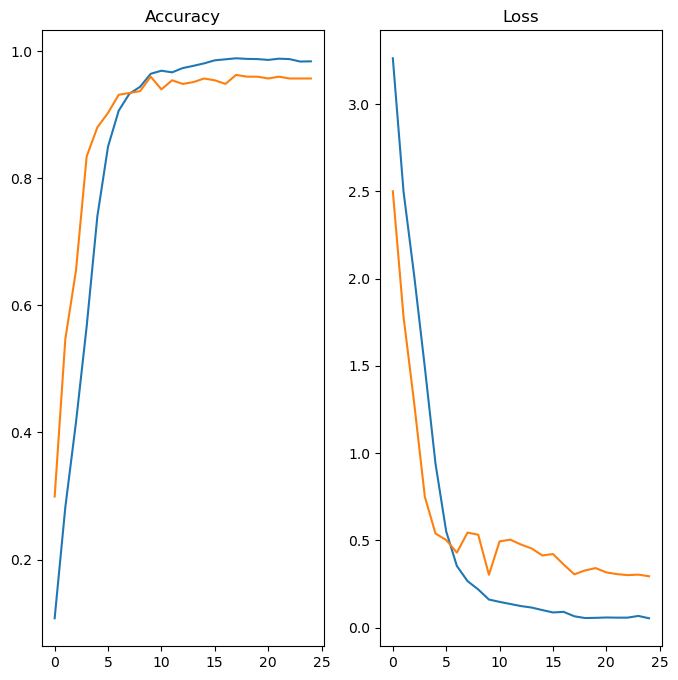

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 82.31


In [20]:
model.save('Image_classify.keras')